In [110]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Helper libraries
from pandas import read_csv
import numpy as np
import pandas as pd
import cv2
import random

# 修改过时的函数
try:
    # 如果使用 TensorFlow 2.x
    tf_loss_function = tf.compat.v1.losses.sparse_softmax_cross_entropy
except AttributeError:
    # 如果使用 TensorFlow 1.x
    tf_loss_function = tf.losses.sparse_softmax_cross_entropy


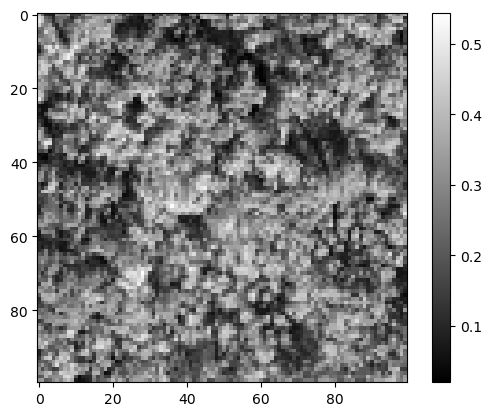

In [111]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# 设置图像大小
image_size = 100

# 定义图像文件夹路径
airplane_dir = "airplane"
forest_dir = "forest"

# 创建空数组存储图像和标签
array_of_img = []
labels = []

# 读取airplane文件夹中的图像
for filename in os.listdir(airplane_dir):
    img = cv2.imread(os.path.join(airplane_dir, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = cv2.resize(img, (image_size, image_size))
    array_of_img.append(img)
    labels.append(0)

# 读取forest文件夹中的图像
for filename in os.listdir(forest_dir):
    img = cv2.imread(os.path.join(forest_dir, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = cv2.resize(img, (image_size, image_size))
    array_of_img.append(img)
    labels.append(1)

# 将图像和标签转换为numpy数组
train_images = np.array(array_of_img)
train_labels = np.array(labels)

# 打乱数据集顺序
indices = np.arange(train_images.shape[0])
np.random.shuffle(indices)
train_images = train_images[indices]
train_labels = train_labels[indices]

# 随机选择80张图像作为训练集
train_images = train_images[:]
train_labels = train_labels[:]

# 显示随机选择的图像
sample = random.randint(0, 99)
plt.figure()
plt.imshow(train_images[sample], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [112]:
from tensorflow import keras

# 使用 Keras 的其他代码

In [113]:
data_augmentation = keras.Sequential(
    [
        keras.layers.GaussianNoise(0.1, input_shape=(image_size, image_size, 3)),
        keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

In [114]:
class_names = ['airplane', 'forest']

In [115]:
train_images.shape

(200, 100, 100)

In [116]:
len(train_labels)

200

In [117]:
train_labels

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1])

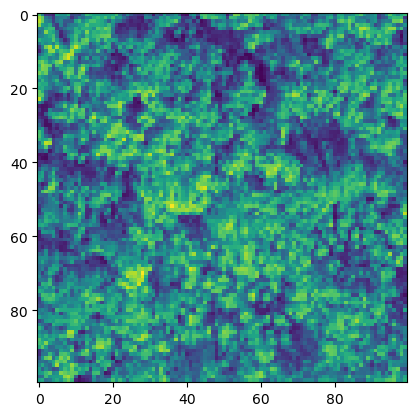

In [118]:
plt.imshow(train_images[sample])


In [119]:
print(train_images[sample].shape)


(100, 100)


In [120]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(25, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(50, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(50, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(100, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(100, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(200, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])


In [121]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 100, 100, 25)      700       
                                                                 
 conv2d_41 (Conv2D)          (None, 100, 100, 50)      11300     
                                                                 
 batch_normalization_30 (Ba  (None, 100, 100, 50)      200       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 50, 50, 50)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 50, 50, 50)      

In [122]:
X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=3)
del train_images
del train_labels

save_weights = 'save_weights.h5'
last_weights = 'last_weights.h5'
best_weights = 'best_weights.h5'
# model.load_weights(best_weights)

checkpoint = keras.callbacks.ModelCheckpoint(best_weights, monitor='val_accuracy', save_best_only=True, mode='max',
                                             verbose=1)
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=0, mode='auto',
                                           min_delta=0.0001, cooldown=0, min_lr=0)
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='auto')
callbacks = [checkpoint]

In [123]:
X_train.shape,X_val.shape

((180, 100, 100), (20, 100, 100))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 33856)             0         
                                                                 
 dense_34 (Dense)            (None, 64)              

c:\Users\18094\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/6 [========================>.....] - ETA: 0s - loss: 0.6377 - accuracy: 0.5188
Epoch 2: val_accuracy did not improve from 0.40000
6/6 [==============================] - 0s 41ms/step - loss: 0.6388 - accuracy: 0.5111 - val_loss: 0.6409 - val_accuracy: 0.4000
Epoch 3/10
5/6 [========================>.....] - ETA: 0s - loss: 0.6033 - accuracy: 0.6938
Epoch 3: val_accuracy improved from 0.40000 to 0.65000, saving model to best_weights.h5
6/6 [==============================] - 0s 41ms/step - loss: 0.5846 - accuracy: 0.7222 - val_loss: 0.5291 - val_accuracy: 0.6500
Epoch 4/10
5/6 [========================>.....] - ETA: 0s - loss: 0.4273 - accuracy: 0.8438
Epoch 4: val_accuracy improved from 0.65000 to 0.90000, saving model to best_weights.h5
6/6 [==============================] - 0s 40ms/step - loss: 0.4095 - accuracy: 0.8500 - val_loss: 0.3163 - val_accuracy: 0.9000
Epoch 5/10
5/6 [========================>.....] - ETA: 0s - loss: 0.2950 - accuracy: 0.8750
Epoch 5: val_accuracy improved f

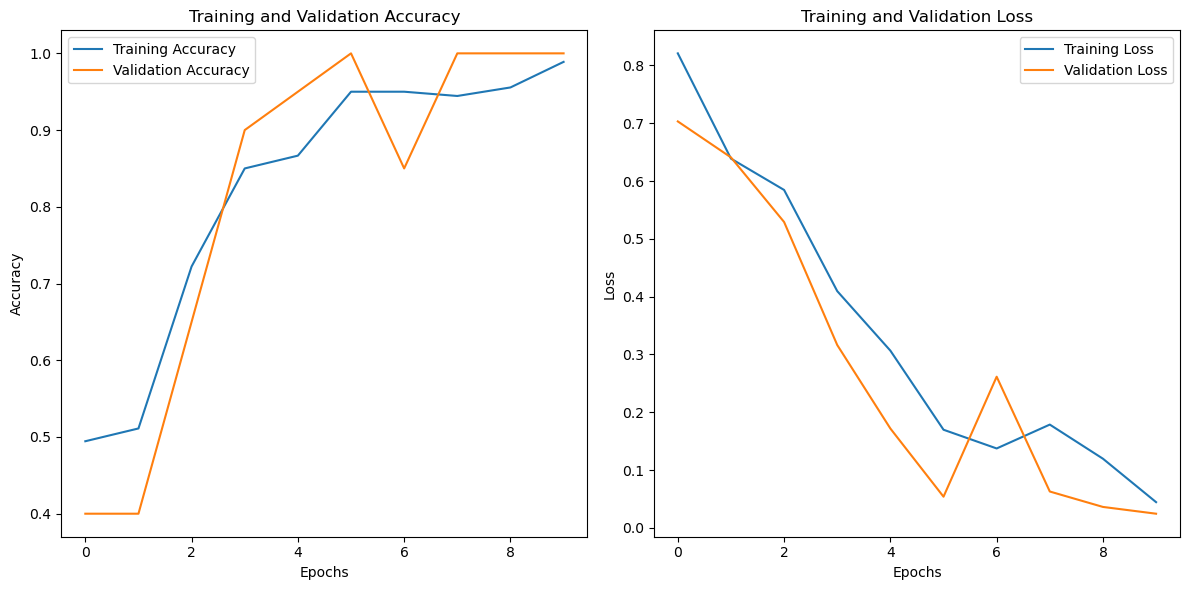

In [124]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 构建模型（假设你的模型是这样的，根据实际情况修改）
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型（假设使用二分类问题的二元交叉熵作为损失函数）
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 输出模型结构
model.summary()

# 训练模型
hist = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), use_multiprocessing=True, callbacks=callbacks, workers=1)

# 保存最后一轮训练好的权重
last_weights = 'last_weights.h5'
model.save_weights(last_weights)
model.save('my_model.h5')
# 绘制训练过程中的精度和损失曲线
plt.figure(figsize=(12, 6))

# 绘制训练集和验证集精度曲线
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 绘制训练集和验证集损失曲线
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [125]:
# 加载模型
loaded_model = model

# 打印模型结构
loaded_model.summary()




Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 33856)             0         
                                                                 
 dense_34 (Dense)            (None, 64)              

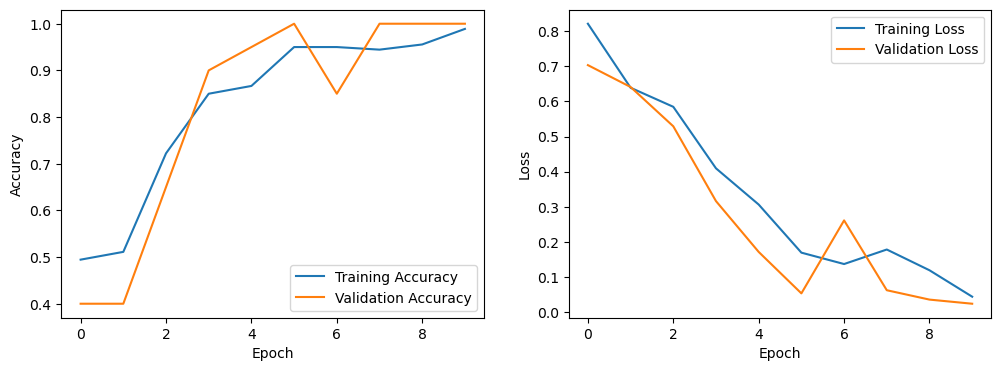

In [126]:
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, confusion_matrix

# 绘制学习曲线
plt.figure(figsize=(12, 4))

# 绘制训练集和验证集的准确率
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 绘制训练集和验证集的损失
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [127]:
# 对测试集进行预测
predictions = model.predict(X_val)
predicted_labels = (predictions > 0.5).astype(int)

# 计算准确率和召回率
accuracy = accuracy_score(Y_val, predicted_labels)
recall = recall_score(Y_val, predicted_labels)

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')


1/1 [==============================] - 0s 62ms/step
Accuracy: 1.0000
Recall: 1.0000


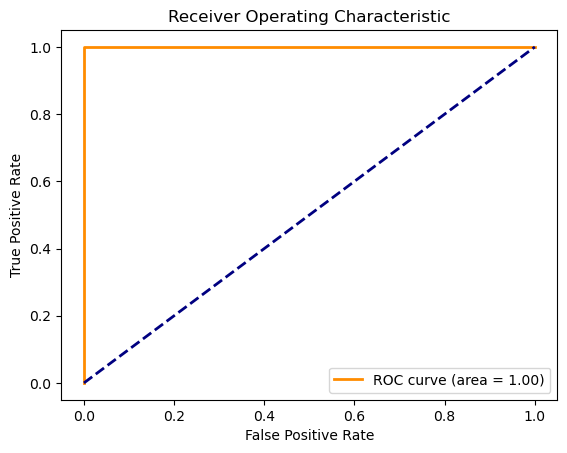

In [128]:
# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(Y_val, predictions)
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

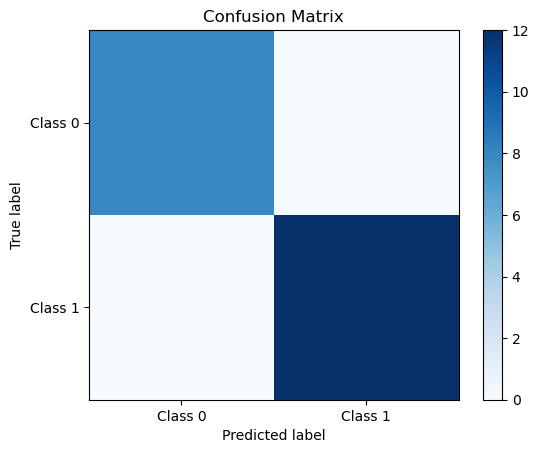

In [129]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(Y_val, predicted_labels)

# 绘制混淆矩阵
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()